# Introduction

An overwhelming amount of research suggests that having a college degree can lead to higher salaries, as well as higher job security[1][2]. However, with many colleges to select from, it raises the question of whether or not getting a college degree from one university over another yields more prosperous job opportunities. A recent trend is showing that the selectivity of prestigious schools is increasing due to the increasing number of applicants applying to these schools each year[3]. The strong preference among students for prestigious universities challenges the notion that all colleges are equal. Our research project looks at colleges across America and attempts to predict which set of college attributes best predicts the highest post-undergraduate salary specifically for computer science majors.

The setting of our research project, namely colleges in America, is especially important due to the high stakes of college admissions. Since many civilian jobs now require a college degree and going to college is increasingly the social norm, many high school seniors are going through the college admissions process and finding themselves without much guidance as to what college to pick. This is especially true for first-generation college students and children of immigrants, whose parents may have little familiarity with the American college system. Thus the results of our analysis are essential for providing students guidance, and are applicable to a large number of high school seniors given the increasing popularity of majoring in computer science. Further, since college tuition is increasing yearly, the results of our analysis are especially crucial to students undertaking large amounts of student loans, who need to know how to maximize their post-undergrad salary in order to pay off their debts more quickly. 

In order to analyze post-undergrad salary maximization, we have developed the following research question: **`"Which combination of factors best predicts the salary of computer science undergrads, and what aspects of these factors (ex. higher vs lower factor values) maximizes the predicted salary?"`** The college attributes, or factors, that we have chosen to examine are mostly ones that are commonly referenced by news sources and websites as metrics for college performance. They are as follows: college prestige ranking, teacher-student ratio, student undergraduate population, post-graduation salary for computer scientists, average professor ratings, and salary by area (sometimes called area salary). We define "salary by area" to be the salaries of computer-science jobs in the same geographical region of the college of interest, or more technically, the same (non)metropolitan area as the college of interest. A metropolitan area, as defined by the Bureau of Labor Statistics (BLS), is an urban center and its rural surroundings, whereas a nonmetropolitan area does not have an urban center. Nonmetropolitan and metropolitan areas are described by the counties within it.

Data for each factor was gleaned from a variety of sources. College prestige rankings came from topuniversities.com, a website created by QS Quacquarelli Symonds and in partnership with Elsevier. Post-graduation salary for computer scientists also came from a website, namely payscale.com by Payscale Inc. From the National Center for Education Statistics (NCES), we retrieved data for teacher-student ratio, student undergraduate population, and school county. Salary by area data came from the Bureau of Labor Statistics. Lastly, ratemyprofessor.com, created by Rate My Professors and owned by Altice USA News, provided average professor ratings per school.

Through data analysis, we found that the best predictors of post-undergrad salary are prestige, salary by area, average professor rating, and teacher-student ratio. Greater prestige, lower teacher-student ratios, higher salary in the area that the college is located, and higher average professor ratings maximizes predicted salary. Though it appears that salary by area can be used to predict post-undergrad salary, we analyzed the differences between a school’s post-graduate salaries and salaries in the same geographical area. Our goal was to see whether students tended to get jobs in the same place they went to college, as a tendency to do so may suggest to college applicants that they should more carefully consider the salaries in the area where a college is located (a factor often given less priority during college hunting). Our results for this were not statistically significant, so we made no conclusion about where students are getting jobs after graduation. 


<b> Sources: </b>

[1] https://www.aplu.org/projects-and-initiatives/college-costs-tuition-and-financial-aid/publicuvalues/employment-earnings.html#:~:text=The%20evidence%20that%20a%20college,on%20average%20over%20their%20lifetime.
<br>
[2] https://www.insidehighered.com/news/2016/08/22/study-finds-graduates-most-selective-colleges-enjoy-earnings-payoff#:~:text=The%20results%20show%20that%2C%20after,and%2019%20percent%20more%20than
<br>
[3] https://www.theatlantic.com/education/archive/2016/03/where-admissions-went-wrong/475575/ 

## Collected Dataset
This dataset was created via a data collection and cleaning process that can be found in the Appendix. It is important to note that during our data cleaning process, we converted prestige rankings from numbers 1-600 to ranks of 1-4, with 1 being the best. The purpose of this was to remove unimportant variations in exact ranking, which may vary from source to source; we only care if the college is generally good or bad, not whether it was exactly 1st or 3rd place. 

We also want to note that some colleges appearing on the `topuniversities.com` ranking list did not have salary data on `payscale.com`. We removed these schools from consideration because if we were to manually Google and input these salaries, this would generate inconsistency with our existing salary data as different online sources use different data collection and analysis methods to calculate post-graduation salaries.

In [1]:
import pandas as pd
main = pd.read_csv("main.csv")

# Delete extra index column, introduced by pandas during conversion to CSV 
del main["Unnamed: 0"]
main.head()

,school,rank,tsr,pop,early_pay,a_mean,a_median,county,rat
0,Massachusetts Institute of Technology,1,3.0,4602,99800,100149.41,96790.0,Middlesex County,3.94
1,Harvard University,1,7.0,9950,96100,100149.41,96790.0,Middlesex County,3.95
2,Tufts University,4,9.0,5643,88000,100149.41,96790.0,Middlesex County,3.81
3,Stanford University,1,5.0,7087,107400,122369.38,124350.0,Santa Clara County,3.97
4,Carnegie Mellon University,1,10.0,6589,99000,86185.62,83340.0,Allegheny County,3.77


---
# Data Description
In this section, we compile important characteristics of our final dataset shown above. Understanding the characteristics and motivation behind our data will allow us to better interpret later numerical analysis results in context. 

**What are the observations(rows) and the attributes(columns)?**

The observations are colleges (though the row indices are indices starting from 0). The attributes are: 
- `school`
- `rank` (a ranking between 1-4, with 1 being the most prestigious)
- `tsr` (teacher-student ratio, in the format #, where # is # of students per teacher)
- `pop` (student undergrad enrollment)
- `early_pay` (average early career pay, meaning within 5 years of graduating, for computer science majors)
- `a_mean` (the mean salary for computer scientists in the college's geographical region)
- `a_median` (same as `a_mean`, but for medians)
- `county` (school's county, for reference purposes rather than actual data analysis)
- `rat` (average professor rating)

**Why was this dataset created?**

With the number of college applicants increasing, more and more choices for colleges, and tons of ranking lists and information online, students may struggle to determine what factors to consider when choosing to apply to college in a way that will maximize their post-undergrad salary. This dataset provides data for us to research what combination of factors maximizes early career salaries for computer science majors, and was built from a collection of other datasets, each of which was created for various reasons. 

We used datasets from the Bureau of Labor Statistics, which were created for the purpose of giving the government an accurate picture of the various occupations per major regions in the US and the earnings of laborers, so that the government can make more informed labor-related decisions. We also manually collected data from `ratemyprofessors.com`, a site that hosts professor reviews in order to give students a central location to share honest opinions about their teachers without the scrutiny of institutions. 

The majority of our datasets about college characteristics comes from The National Center for Education Statistics, which  creates educational statistics datasets to help the government make informed education-related decisions and for international comparison between the state of U.S. education and that of other nations. Both of the datasets we web-scraped were created by companies that wanted to provide information to the public to help students and employees make informed choices about their future: for example, the computer science salary by school dataset that we web-scraped from `payscale.com` is meant to help employees better estimate their worth in the job market, by comparing their current salary to the average of the school they went to, while the `topuniversities.com` ranking list by company QS Quacquarelli Symonds is for high school seniors hunting for colleges.

**Who funded the creation of this dataset?**

The funding history of our final dataset ties back to the funding of the entities whose data we used. Both the Bureau of Labor Statistics and the National Center for Education Statistics are federal agencies operating off government funding to generate their datasets.

However, for data collected from websites, it is less clear where the funding is coming from. The website hosting computer science salary data, `payscale.com`, is owned by Payscale, a company that generates revenue by creating software that clients may use through a license, but people don't have to pay to use their salary data, nor is anyone paid to fill out surveys about their salaries. Meanwhile,`ratemyprofessors.com` is a website owned by Altice USA News; though this company funds the upkeep of the rating site, the data itself isn't created via funding, as students aren't paid to leave reviews and only do so voluntarily. 

`topuniversities.com` has the most interesting funding background. QS Quacquarelli Symonds owns the website and funds the QS Intelligence Unit, which gathers the ranking data. There are claims on <a href=https://en.wikipedia.org/wiki/QS_World_University_Rankings#cite_note-QC2012-24>Wikipedia</a> that the company purchased mailing lists or bought survey responses, but the sources cited in the article are unclear about this. Unsurprisingly, the company has not admitted to any of these claims, so it is uncertain what the truth is. It may not be so important if surveys were bought, since from a data science perspective, the use of surveys itself may be more of an issue.

**What processes might have influenced what data was observed and recorded and what was not?**

Collecting salary data from every major region in the U.S. is not an easy task, especially in rural areas. It is pointed out [1] that the Bureau of Labor Statistics has less data points from (non)metropolitan areas, since the process of finding and communicating with relevant employers in a rural, spread-out region is more difficult than in a centralized city location. Further, the Bureau uses the <a href=https://www.bls.gov/bls/blswage.htm#Metropolitan>process of sending out surveys to employers to gather salary information</a>, and responses to the surveys are only <a href=https://www.bls.gov/respondents/oes/faqs.htm#5>mandatory in some states</a>. Data observations then directly relate to who actually responds. Only a statistically significant sample of US businesses are selected for surveying in the first place, so a random process influences what data points are even attempted to be recorded. 

For `ratemyprofessors.com`, the process of signing up to leave a review does not include a background check to ensure that students leaving reviews are actual students of the professor in a specific university, leading to the possibility of inaccurate data points being recorded. A psychological process also comes into play: how strong the user feels about their experience with a professor will affect their desire to rank them, which means students with more passionate feelings may leave more extreme reviews, while students who had good experiences may not even feel the need to write a review at all. 

According to <a href=https://www.payscale.com/college-salary-report/methodology>Payscale's methodology</a>, salary data by school is collected via a voluntary online survey. If graduates want to know their price in the labor market, they have to provide their current salary, characteristics, etc. in return for a report from the Payscale website, so there is an incentive for graduates to fill out the survey. On the flip side, psychological processes may result in people who are more insecure about their salary (especially if it is very low) being more likely to respond to the survey. Payscale evidently rigorously checks the accuracy of the information provided, such that fake data points are not recorded. Similar to Payscale, the NCES uses surveys to gather information regarding educational factors for their respective studies. This data method could influence what data was observed and recorded because the completeness and reliability of the data is reliant upon the accuracy and truthfulness of the surveys as well as how many people participated in the survey. 

Lastly, according to the <a href=https://www.topuniversities.com/subject-rankings/methodology>methodology</a> for TopUniversities, the website gathers citation information to help rank computer science programs. This citation information comes from Scopus, a database of 69 million peer-reviewed titles, but it is feasible that research papers from schools may not make it onto this site. Since only 5-year’s worth of data from Scopus is analyzed, this process means that schools that peaked in research citations prior to that time period may be ranked differently than if that past data were included. Additionally, TopUniversities sends surveys to academics and employers to gather ranking opinions, so as with surveys used for NCES and Payscale, the accuracy of the responses and who responds may vary (if the person even responds). Notably, if someone does choose to respond, they are not allowed to rank their own school. 

All of the processes above then directly affect our dataset, because we used the raw data from these entities without discarding any of their data points except those related to schools not on our ranking list (and as aforementioned, we did not consider schools without salary data on `Payscale.com`). 

[1] https://www.ncbi.nlm.nih.gov/books/NBK190072/#:~:text=CONCLUSION,data%20are%20not%20as%20reliable

**What preprocessing was done, and how did the data come to be in the form that you are using?**

Please see the data cleaning information in the Appendix for details on the processing of the final dataset. All of the sites and entities discussed above ran their data through their own statistical analysis before making the datasets public and available for use in our own dataset. For example, Payscale filtered out inaccurate salary reports from respondents before calculating average salary by school. Meanwhile, TopUniversities standardized their survey results, while also calculating the H-index, a measure of how productive a researcher is related to the number of their publications and how often they are cited as a source, to include in their rankings calculations. Notably, `ratemyprofessors.com` does not appear to do any major processing of the reviews left on the site, though site maintainers do check reviews for constructiveness and reviews can be reported for not following the site’s etiquette guidelines. 

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

Most of the datasets we used to build our `main` dataframe involved surveying of some kind. The survey respondents were aware that the information that they were filling out would go towards a general dataset of information that would be presented to the public. They expected that the information that they gave on their surveys would be used accurately and truthfully to reflect their experiences, and responding was largely voluntary (expect for employers in states where the Bureau of Labor Statistics required a response, but even then, respondents were well-informed of the purpose of the survey). 

**Where can your raw source data be found, if applicable?** 

The datasets can be found in Github at https://github.com/tangteresa/INFO2950-Project.

# Data Analysis Part I: Exploratory 

Before preregistering ideas for how we will use numerical analysis to answer our research question, we want to see the general shape of each our factors and get a sense of how closely grouped the data is using histograms. This will help us design numerical analyses that suit the data. In addition, seeing how closely grouped the data is is especially necessary because for example, if computer science post-undergrad salaries are super close together and there is little variation, this may tell us that analyzing what school has the highest post-undergrad salary is not important, as they are all practically the same regardless. 

In [2]:
import matplotlib.pyplot as plt

---
#### Post-Undergrad Salary 

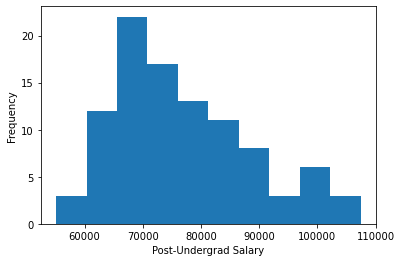

In [3]:
plt.hist(main["early_pay"])
plt.xlabel("Post-Undergrad Salary")
plt.ylabel("Frequency")
plt.show()

In [4]:
pay_sum_stats = main["early_pay"].describe()
print(f"Median: {main['early_pay'].median()}")
print(f"Std dev: {round(pay_sum_stats['std'], 2)}")
print(f"Min: {round(pay_sum_stats['min'], 2)}")
print(f"Max: {round(pay_sum_stats['max'], 2)}")

Median: 73850.0
Std dev: 11778.18
Min: 55100.0
Max: 107400.0


While we originally thought computer science salaries were likely to be super high (90k+) and closely grouped (as in, all with a few thousand dollars of each other), we see that even though computer science is hyped as a high-paying field, there is still lots of wiggle room and a very real possibility of earning less than 90,000 a year. In fact, most of the salaries are 70k to 80k ish (based on the histogram), with a median of `73850`. This is much lower than we expected. 

We see that the standard deviation of `11778.18` is fairly large, and there is a big range of roughly $50,000 between a min of `55100` and a max of `107400`. This confirms the importance of our research; for a fresh college graduate who likely has lots of student debt, getting a job paying 100,000+ dollars versus a job of 50,000 dollars ish can make a huge difference in their quality of life and financial situation. Since there is such a huge range in which a graduate's salary may fall, it would greatly benefit these students to know what college characteristics they should look out for to maximize their likelihood of getting a job with a salary on the higher end of this histogram. 

**Note**: We do not take the mean because these salary points are already averages of computer scientists from a given school, so taking the average of an average doesn't make much sense. Plus, the histogram shows that the data is skewed to one side, so a median is more representative of the data 'center' anyway. 

---
#### Mean Area Salary

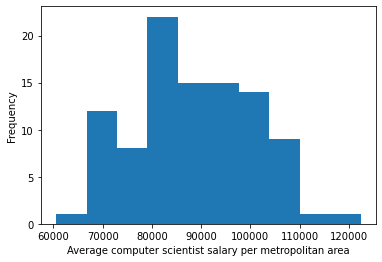

In [5]:
plt.hist(main["a_mean"])
plt.xlabel("Average computer scientist salary per metropolitan area")
plt.ylabel("Frequency")
plt.show()

In [6]:
area_sum_stats = main["a_mean"].describe()
print(f"Median: {main['a_mean'].median()}")
print(f"Std dev: {round(area_sum_stats['std'], 2)}")
print(f"Min: {round(area_sum_stats['min'], 2)}")
print(f"Max: {round(area_sum_stats['max'], 2)}")

Median: 87052.645
Std dev: 11701.77
Min: 60551.67
Max: 122369.38


It is interesting to compare this histogram and its stats to the characteristics of post-undergrad salary. While the standard deviations for these two factors are practically the same (about `11701` versus `11778`), the mean area salary data sits 'higher' than the post-undergrad salary data, as the median and max for mean area salary are higher than that of post-undergrad salary by about 10k. While we have not yet matched up post-undergrad and area salary for each school, this trend may be evidence that graduates aren't necessarily getting jobs in the same area as the college they went to. 

On the other hand, the mean area salaries may be higher than what we predict because we took the average of computer science job salaries in a given metropolitan area. Certain areas with one or two higher paying jobs may have means pulled by up these outliers, so it may be more accurate to analyze the median area salary instead regardless of how it relates to post-undergrad salary. At this point, we updated our dataset to also include median salaries by area and compare the results as follows.

#### Median Area Salary

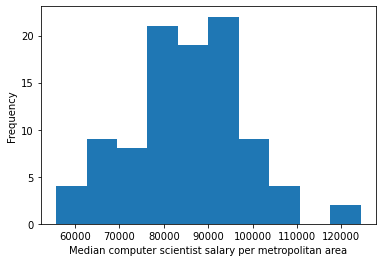

In [7]:
plt.hist(main["a_median"])
plt.xlabel("Median computer scientist salary per metropolitan area")
plt.ylabel("Frequency")
plt.show()

In [8]:
marea_sum_stats = main["a_median"].describe()
print(f"Median: {main['a_median'].median()}")
print(f"Std dev: {round(marea_sum_stats['std'], 2)}")
print(f"Min: {round(marea_sum_stats['min'], 2)}")
print(f"Max: {round(marea_sum_stats['max'], 2)}")

Median: 85595.0
Std dev: 12676.54
Min: 55720.0
Max: 124350.0


After adding the median salary, we think that the median salary by area will be better than mean area salary in future calculations, since for any given college, the median and mean differ noticeably, so the salaries by area are skewed. A median would be a better representation of the center of salaries per area. 

Comparing this histogram with that of post-undergrad salary, we see a similar trend that happened with the mean salary by area: the median and max are higher by about 10k, but the standard deviation is roughly the same (`12676.54` and `11778.18`). Since the mean and median salary both exhibit this trend compared to post-undergrad salary, we are fairly confident now that this is because of an underlying factor unrelated to skewing due to high salaries. The post-undergrad salary histogram is skewed left, while this one is more symmetric, so it is possible that graduates tend to move to lower-paying areas away from where they went to college (but to be more clear about this, we need more statistical analysis). Another possibility is that people with lower salaries are more likely to report to Payscale, because they are more interested in how they compare to others. 

#### Teacher Student Ratio 

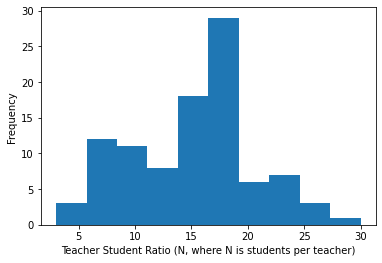

In [9]:
plt.hist(main["tsr"])
plt.xlabel("Teacher Student Ratio (N, where N is students per teacher)")
plt.ylabel("Frequency")
plt.show()

In [10]:
tsr_stats = main["tsr"].describe()
print(f"Median: {main['tsr'].median()}")
print(f"Mean: {round(tsr_stats['mean'], 2)}")
print(f"Min: {round(tsr_stats['min'], 2)}")
print(f"Max: {round(tsr_stats['max'], 2)}")

Median: 16.0
Mean: 15.02
Min: 3.0
Max: 30.0


While the range is fairly large at `27` (max of 30 - min of 3), the min/max didn't appear to skew the mean as much, as both the median and mean are fairly close, so we can see that the typical teacher student ratio is about `15` to `16`. However, the summary stats don't reveal the interesting fact that the histogram reveals: there are two peaks in the data. This is likely due to school size, as big schools likely have a higher student ratio (at peak around `17`), while the smaller schools are lower (at peak around `7`). This histogram is especially useful because it shows us that there are a large portion of schools with practically identical teacher-student ratios, so if these schools have vastly different salaries, we can more easily suggest that teacher-student ratio may not be a significant differentiator for salary. Because of the relationship between teacher student ratio and enrollment, we predict that the enrollment histogram will have two peaks also.

#### Enrollment

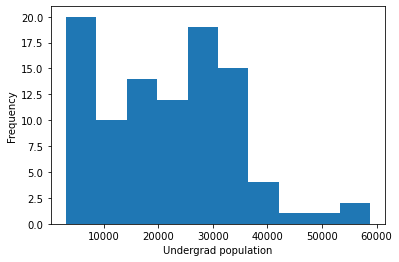

In [11]:
plt.hist(main["pop"])
plt.xlabel("Undergrad population")
plt.ylabel("Frequency")
plt.show()

In [12]:
enroll_stats = main["pop"].describe()
print(f"Median: {main['pop'].median()}")
print(f"Mean: {round(enroll_stats['mean'], 2)}")
print(f"Std dev: {round(enroll_stats['std'], 2)}")

Median: 21218.5
Mean: 21984.16
Std dev: 12212.67


We see from the standard deviation of `12212.67` that there is a decent representation of school sizes in our dataset. While the mean and median show that our typical school size is about `21000` to `22000` (as expected), there are a surprisingly large amount of schools (roughly 20) with less than `10000` students. 

As predicted, there are roughly 2 peaks in the enrollment histogram, just like in the teacher-student ratio histogram. For teacher student ratio, there were ~20 schools in the 7-10 range, and we see there are about 20 schools in the <10k enrollment range. There are also ~30 schools with a teacher student ratio around 16-17, and at least 30 schools in the 30k enrollment range. This may suggest a closer relationship between teacher student ratio and undergraduate population than expected that can be revealed with further statistical analysis. Originally, we thought teacher student ratio and enrollment would be fairly distinct: teacher student ratio was intended to measure individual attention (i.e. how personalized a teacher's instruction can be -- the more personalized, the better equipped a computer science student is likely to be), while we thought of undergrad enrollment as more related to number of alumni connections and opportunities, but if it turns out that there is a signifcant correlation between these two variables, we may need to throw out one of them, as in that case either one may be used to predict/correlate with salary.

#### Average Professor Rating

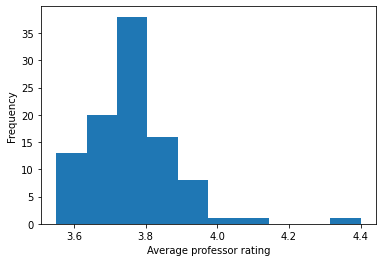

In [13]:
plt.hist(main["rat"])
plt.xlabel("Average professor rating")
plt.ylabel("Frequency")
plt.show()

In [14]:
rat_stats = main["rat"].describe()
print(f"Median: {main['rat'].median()}")
print(f"Mean: {round(rat_stats['mean'], 2)}")
print(f"Std dev: {round(rat_stats['std'], 2)}")
print(f"Max: {round(rat_stats['max'], 2)}")

Median: 3.75
Mean: 3.76
Std dev: 0.12
Max: 4.4


When we manually collected the professor rating, we noticed that most ratings seemed fairly close together. This histogram confirms our observation: the standard deviation is only `0.12`, and most ratings are between `3.6` and a little over `3.8`, with an average of `3.8`. At this point, it does seem like the closeness of the datapoints is a problem, since it may not be a great differentiator between schools and their graduate salaries if all ratings are practically the same. We cut out the outlier at 4.4, to see if we can better zoom in on the shape of data points between `3.6` to `3.8` roughly: 

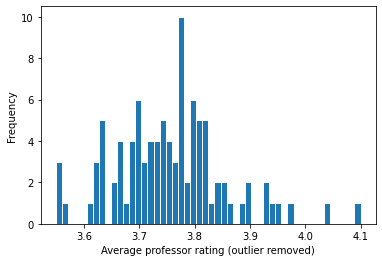

In [15]:
subset = main.copy()[main["rat"] != rat_stats["max"]]
plt.hist(subset["rat"], bins = 50, edgecolor = 'white')
plt.xlabel("Average professor rating (outlier removed)")
plt.ylabel("Frequency")
plt.show()

With this histogram, it is easier to see that there is a decent variety of ratings and also fine differences between the ratings, on the scale of hundredths. While it could be argued that the ratings are so close that the differences in hundredths between them don't matter, we think that the closeness is important. A school on `ratemyprofessors` typically has thousands of ratings, so with such a large sample size, it does matter that a school has, for example, a rating of `3.65` versus `3.68`, because moving from a rating of `3.65` to `3.68` would take hundreds of positive reviews to move up the average. So we will keep average professor rating as a factor in predicting post-undergrad salary. 

#### Additional/Miscellaneous Notes about Exploratory Data Analysis
- We didn't create a histogram for just school prestige ranking, as it would not tell us anything new. Because we set up our rankings in 'bins' of 1-4, we already know the prestige rankings are skewed, as there are more schools in the lower bins (since rank 1 is only the top 20 schools)

# Preregistration Statements
To recap, our research question is `"Which combination of factors best predicts the salary of computer science undergrads, and what aspects of these factors (ex. higher vs lower factor values) maximizes the predicted salary?"` In order to answer this question, along with related questions raised by the exploratory data analysis above, we generated the following experiments.

## Brief Overview

<b> Checking similarities between variables: </b> We want to calculate the correlation between student-teacher ratio and student enrollment.

<b> Linear regressions (single variable): </b> We want to use single variable linear regressions with each of our factors (student ratio, prestige, student enrollment, professor ranking, and area salary) and post-graduation salary to check the relationships between any factor and our salary outcome.

<b> Linear regressions (multivariable): </b> We want to use multivariable linear regressions with combinations of our factors and post-graduation salary to analyze the relationship between multiple predictors and the salary outcome.

**Histogram of differences**: We will use a histogram of differences between salary by area and post-graduation salary to see if students get jobs in the same place they went to college.

## Hypothesis/Analysis Preregistrations
Below is a more in depth explanation of our specific hypotheses and what exactly we are preregistering.

1. We hypothesize that `student-teacher ratio and student enrollment are closely related factors (indistinct)`, because in the Exploratory Data Analysis section, we saw that the histograms of the factors had similar trends. Plus, student-teacher ratio is inherently connected to the size of the student population. <br>
<br>
To test our hypothesis, we will calculate the correlation coefficient. We still say the factors are indistinct if the coefficient is at least 0.7, because that roughly indicates a strong relationship. <br>
<br>
The correlation matters because if there is notable correlation, then we only want to use one of these factors in our regression analysis. Using two highly correlated factors in a regression (especially multivariate) will not provide more information than if we only used one of the correlated factors, and may even impact the linear regression fit. 

2. We hypothesize that **`only prestige`**` will be the best predictor of post-undergrad computer science salary, and that higher prestige values/rankings will maximize the predicted salary`. Our hypothesis that only prestige will matter is based on results in the Exploratory Data Analysis section: average professor rating may be an indicator of student bias rather than teaching quality, and the salary of the area in which a college is located did not show similar trends to the histogram of post-undergrad salary. Meanwhile, based on other histograms, most schools had student enrollment and teacher-student ratio in the same range, meaning that enrollment/teacher-student ratio may not be a distinguishing factor between schools. For these reasons, we think it is likely that these factors will have little relationship with post-undergrad salary, and that only prestige may matter. We believe higher prestige rankings will maximize predicted salary based on the trend in society that students from more prestigious colleges seem to receive more pay. <br>
<br>
We will test our hypothesis by performing single variable regression analyses between post-undergrad salaries and each of our factors. However, we will also perform a multivariable regression for each combination of factors, since with single variable regressions, we cannot hold other factors constant when comparing one factor with post-undergrad salary. On the other hand, multivariable regressions do allow for constancy, possibly leading to more accurate results because we can be certain that when analyzing a variable and its relationship with post-undergrad salary, we aren’t also comparing colleges of completely different prestiges, or completely different sizes, etc. <br>
<br>
Thus, in our experiment we will also perform a multivariable regression on combinations of factors to determine which combination model has the best fit (highest R^2 score). By checking a variety of combinations, we can be more confident that we have found the best predictor(s) for salary from a group of options. 

3. We are curious about whether computer scientists tend to get jobs in the same area where they went to college, and based on differing histogram shapes from the Exploratory Data Analysis section, we hypothesize that `computer scientists don’t tend to find jobs where they go to college, or at least don't find jobs in areas with similar salary ranges as the area they graduated from`. We will gather evidence for or against our hypothesis by matching up these factors for each school, finding the differences, and then plotting a histogram of the differences. If the histogram is skewed left or right (high differences), then it suggests that computer scientists don’t tend to stay in the same area where they went to college for jobs, whereas if the differences are small, it is possible that computer scientists do tend to either stay or go to areas with similar salary ranges as the area of their college. <br>
<br>
This section with histograms is distinct from the regression we will use on area salary vs post-undergrad salary. The regression will hopefully tell us if, for example, students graduating from high-earning areas tend to also get high-earning jobs, but it's possible that the area where they get a job is still much less in terms of pay than where they graduated from (since the histogram for post-undergrad salary seemed to be centered lower than that of the area salary). With the difference histograms, it will be easier to get a sense of the magnitude of difference between the factors.

# Data Analysis Part II: Quantitative Analysis with Interpretations
In this section we will use numerical analysis to investigate the preregistered items from above. 

## Correlation for student ratio/enrollment

As stated in our preregistration analyses, we want to know whether teacher-student ratio and enrollment are closely related  enough for one of the factors to be thrown out, and we will test this via correlation calculation. 

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [17]:
# Subset the dataframe to only get the student ratio and population columns
strat_enr = main[["tsr", "pop"]]

corr = strat_enr.corr(method = 'pearson')
corr_val = corr.iloc[0]['pop']
print("The correlation between student ratio and enrollment is: " + str(round(corr_val,2)))

The correlation between student ratio and enrollment is: 0.72


The correlation between student-teacher ratio and enrollment is `0.72`, which can be interpreted to mean that there is a strong positive correlation between the two factors. The correlation of `0.72` surpasses our threshold of `0.7`. Thus it appears that student-teacher ratio and enrollment are essentially redundant variables. Due to this, we will remove student enrollment when performing regression analysis. We remove student enrollment because student-teacher ratio, related to the degree of individualized attention, would be a more important factor for aspiring college students to consider than total student population (since even in big schools, students typically form small communities). 

## Linear regression on predictors for post-graduation salary
We use `itertools.combinations` to find combinations of factors and perform regression calculations on the combos to find the model of best fit. We will compare these models with our hypothesized best model of prestige vs salary. 

In [18]:
from itertools import combinations, chain
from sklearn.linear_model import LinearRegression
import operator
import seaborn as sns

In [19]:
cols = list(main.columns)

# Remove columns that are not important for multivariable regression
cols.remove('school')
cols.remove('a_mean')
cols.remove('county')
# Early pay is our outcome, not an input
cols.remove('early_pay')

# Remove enrollment because it's too closely related to 
# teacher-student ratio, as explained above 
cols.remove('pop')

# Final list of possible inputs, from which we choose combinations, for our regression
cols

['rank', 'tsr', 'a_median', 'rat']

In [20]:
# List to save regression results for each combination, such as R^2, coefficients, and the input names
rsqr_scores = [] 
# Iterate through combinations of 1-4 inputs
for num_inputs in range(1, 5): 
    combos = combinations(cols, num_inputs)
    for combo in list(combos): 
        combo = list(combo)
        
        # Create linear regression model for each input combination and calculate R^2
        model = LinearRegression().fit(main[combo], main['early_pay'])
        score = model.score(main[combo], main['early_pay'])
        rsqr_scores.append((score, model.coef_, combo))

In [21]:
# Find maximum R^2 score out of all of our models
max_score = max(rsqr_scores, key=operator.itemgetter(0))
print(f"The max R^2 is {round(max_score[0], 2)}, with inputs {max_score[2]}")
print(f"The coefficients for this model are {np.round(max_score[1], 2)}")

The max R^2 is 0.7, with inputs ['rank', 'tsr', 'a_median', 'rat']
The coefficients for this model are [-4.570370e+03 -6.526100e+02  2.200000e-01  2.457229e+04]


In [22]:
# R^2 for our hypothesis model, prestige vs salary 
result = list(filter(lambda item: item[2] == ["rank"], rsqr_scores))
print(f"The R^2 is {round(result[0][0], 2)} for prestige, namely input {result[0][2]}")
print(f"The coefficients for this model are {np.round(result[0][1], 2)}")

The R^2 is 0.48 for prestige, namely input ['rank']
The coefficients for this model are [-8043.28]


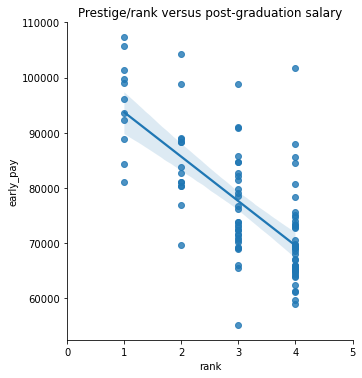

In [23]:
sns.lmplot(x = 'rank', y = 'early_pay', data = main)
plt.title("Prestige/rank versus post-graduation salary")
plt.xlim(0, 5)
plt.show()

For our hypothesized best predictor, namely prestige, we see that the regression coefficient is about `-8043`. This matches our expectation of the trend of the data, because as we can see in the scatterplot of prestige and salary above, there is a clear negative trend. As rank category increases from 1 to 4, salary tends to decrease, meaning that as prestige decreases, salary decreases (note that we defined rank 1 as the highest prestige, not rank 4). While the scatterplot does not immediately tell us exactly how much salary changes with prestige, we know from the regression coefficient value that salary decreases by about 8043 dollars for every increase in rank category.

The R<sup>2</sup> value for our prestige vs post-undergrad salary regression model is `0.48`, indicating that about 48% of the variability in post-undergrad salary can be explained by prestige alone. However, the highest  R<sup>2</sup> value was not for prestige vs post-undergrad salary, but rather for rank, teacher-student ratio, salary by area, and average professor rating vs post-undergrad salary. The  R<sup>2</sup> value for this model was about `0.7`, which can be interpreted to mean that 70% of the variability in post-undergrad salary can be explained by consideration of all of these factors. Thus, of our various models with different combinations of factors, the  R<sup>2</sup> scores tell us that the best predictors of post-undergrad salary are rank, teacher-student ratio, average professor rating, and salary by area. 

Our research question also includes analyzing what aspects of these factors maximizes post-undergrad salary (i.e. high vs low values). From the regression coefficients for the model of the four factors and post-undergrad salary printed above, we see that the coefficient for prestige is `-4.6e03`. The negative sign tells us that as rank category increases from 1 to 4, or best to worst, salary tends to decrease, meaning that better prestige predicts higher salaries. Similarly, the second regression coefficient, `-6.5e02`, tells us that as teacher-student ratio increases (meaning more students per teacher), salary tends to decrease. We can interpret this to mean that less students per teacher better maximizes predicted salary. The regression coefficient for salary by area is `2.2e-01`, which, while small, indicates that when salary by area increases, predicted salary also tends to increase, so a higher salary in the area where the college is located maximizes predicted salary. Lastly, the coefficient for average professor rating is `2.5e04`. The positive sign tells us that as average professor rating increases, so does predicted salary, therefore a higher average professor rating maximizes predicted salary.

Based on the regression coefficients, greater prestige, lower teacher-student ratios, higher salary in the area that the college is located, and higher average professor ratings maximizes predicted salary.

## Starting salary difference from area salary

While we now know that as salary by area increases, post-undergrad salary also increases, we do not know if the salaries in the area where a college is located is close or very different from the salary of graduates of that college. Knowing this information would give us a sense of where college graduates are going, and whether they tend to stay in areas with similar salaries to where they graduated from. We plot a histogram of differences (post-grad salary minus the salary in the college's geographical area) to find out. 

In [24]:
import pandas
from matplotlib import pyplot

In [25]:
# Converting early pay and median salary by area columns to numpy arrays to calculate the difference
starting_salary = main["early_pay"].to_numpy()
area_salary = main["a_median"].to_numpy()
diff = starting_salary - area_salary

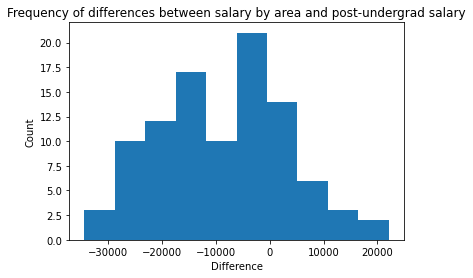

In [26]:
pyplot.hist(diff)
pyplot.xlabel('Difference') 
pyplot.ylabel('Count') 
pyplot.title('Frequency of differences between salary by area and post-undergrad salary')
pyplot.show()

In [27]:
print("The percentage of differences whose absolute value is greater than 7000 is: {:.2f}%".format(100 * (sum(abs(diff) > 7000) / len(diff))))

The percentage of differences whose absolute value is greater than 7000 is: 60.20%


If students were staying in areas with similar salaries to where they graduated from, we would expect the difference between that college's salary by area and its graduates' post-undergrad salary to be close to zero. Of course, we do not expect it to be exactly zero, as differences in post-undergrad salaries and college's salary by area could be attributed to the two data sources sampling different types of computer science jobs. This why we look only at differences greater than 7000 dollars, because a difference greater than 7000 is more likely to be attributed to a true difference in salaries,  rather than sampling different computer science jobs, as 7000 is the rough difference between <a href=https://www.computerscience.org/careers/> different types of computer science salaries</a>. 

We see that the proportion of differences whose absolute value is greater than 7000 dollar is roughly `60%`. We interpret this to mean that there are a large proportion of colleges whose graduates' salaries and salaries of jobs in the area are notably different, which may provide evidence that college students are not staying in places that have similar salaries as where they graduated from. In fact, given the large amount of negative differences in the histogram above, it may suggest that students tend to get jobs in places with lower salaries than where they graduated from, which is unexpected. However, there are significant limitations to this analysis, which will be discussed after we evaluate the significance of this result (below). 

# Evaluation of Significance with Interpretations
Though we have the results from the Data Analysis section, we have to evaluate whether they are likely to have occurred by chance.

## Significance of Correlation 

We want to see how likely it is that our correlation coefficient of `0.72` between enrollment and student-teacher ratio will occur by chance when we randomly shuffle the data. We will first randomly shuffle the enrollment and ratio values and then calculate the correlation coefficient from said shuffled numbers. We will do this 10,000 times to get a large sample of correlation coefficients for our comparison. Since we are randomizing the data, we naturally expect that there is no relationship between the shuffled values, so our null hypothesis for this test is that the correlation is zero.

In [28]:
# Storage array for our 10,000 correlation coefficients
corr_arr = np.zeros(10000)

# Run the shuffled correlation 10,000 times
for i in range(0, 10000):
    enroll_arr= main["pop"].to_numpy()
    tsr_arr= main["tsr"].to_numpy()
    
    # Shuffle enrollment numbers
    enroll_perm = np.random.permutation(enroll_arr)
    
    # Shuffle student-teacher ratio numbers
    tsr_perm = np.random.permutation(tsr_arr)
    
    # Convert to dataframes for easier correlation calculations
    pd_enroll = pd.DataFrame(enroll_perm, columns = ["enrollment"])
    pd_tsr = pd.DataFrame(tsr_perm, columns = ["tsr"])
    
    # Calculate correlation
    correlation = pd_enroll["enrollment"].corr(pd_tsr["tsr"], method = 'pearson')
    
    # Store correlation in storage array 
    corr_arr[i]= correlation

In [29]:
# Find how many correlation coefficients in the storage array are greater than or equal to 0.72
sum_vals = sum(corr_arr >= 0.72)
total_vals = len(corr_arr)
per = sum_vals/total_vals * 100
print("The probability of getting a correlation coefficient of 0.72 from random chance (shuffled data) is: ", round(per,2))

The probability of getting a correlation coefficient of 0.72 from random chance (shuffled data) is:  0.0


Since the probability of getting the correlation value of `0.72` by random chance is 0%, we can confidently reject our null hypothesis, which was that enrollment and student-teacher ratio are unrelated and that the correlation between enrollment and student-teacher ratio was zero. It is extremely unlikely for us to have a correlation of `0.72` if we assume that the two factors are completely unrelated. Therefore, our correlation coefficient is significant and we can use it to say that the two factors are likely redundant and one can be thrown out. 

## Significance of Linear Regressions
We want to know whether our linear regression models' nonzero slopes were likely a result of random chance, because if they were, then comparing the models' R<sup>2</sup> scores or measures of fit is meaningless if there isn't actually a relationship between the factors and post-graduation salary. For each linear regression model resulting from each combination of factors, we use `statsmodels` to calculate p-values for the regression slopes and check if any surpass 0.05, with our null hypothesis being that the true slope is zero (no relationship for that specific set of factors with salary). 

In [30]:
import statsmodels.formula.api as smf

In [31]:
# Iterate through each linear regression model for each combination of inputs
all_good = True 
for num_inputs in range(1, 5): 
    combos = combinations(cols, num_inputs)
    
    for combo in list(combos): 
        combo = list(combo)        
        params = " + ".join(combo)
        sig_model = smf.ols("early_pay ~ " + params, data=main)
        result = sig_model.fit()
        # Panda series type
        pvals = result.pvalues
        
        # Skip checking first pvalue because it's for the intercept, and isn't important 
        # Check remaining pvalues for this model to see if any surpass threshold of 0.05
        for p in range(1, len(pvals) - 1): 
            if abs(pvals[p]) > 0.05: 
                all_good = False 
                print("--Surpasses threshold--") 
                print(pvals)
                break 
print(f"No p-values(absolute value) surpass 0.05: {all_good}")

No p-values(absolute value) surpass 0.05: True


By running this code, we see that for each model, no p-values for the regression slopes surpassed our threshold. Thus, it appears that for each model, there is less than a 5% chance of getting a slope as extreme as the ones resulting from our linear regression models by random chance, assuming that the true slope for that model is zero. So we can reject the null hypothesis; there is evidence that the true slopes for our models are in fact nonzero, meaning there is a relationship between our factors and salary and we can compare the various linear regression fits. 

## Significance of Salary Differences

We want to know the significance of the differences between post-undergrad salary and salary by area. We will be running a proportion test to see whether the true proportion of absolute values of differences that are greater than a threshold of 7000 dollars is greater than 90%. We choose this high threshold proportion of 90% because there is a lot of variation with this data, so we have to have a pretty overwhelming majority to show that there is a significant difference between area salary and post-undergraduate salary. 

In [32]:
from statsmodels.stats.proportion import proportions_ztest

In [33]:
# Take absolute value of difference for our proportion test
abs_diff = abs(diff)
count = sum(abs_diff >7000)
# Calculate proportion test using a z-test
zstat, pval = proportions_ztest(count, len(abs_diff), 0.9, alternative = 'larger')
print("The p value is: ", pval)

The p value is:  0.9999999991602734


The p-value is about 1, which means that we cannot reject our null hypothesis that the true proportion of differences (absolute value) that are greater than 7000 dollars is less than 90%. So even though we have evidence that higher salary by area predicts higher salary, we cannot say with confidence that students are getting jobs in areas with different salaries than the area where they went to college. There are many limitations with this significance metric in particular, as we will explain below.

## Limitations of Significance Metrics
Comparing salary by area and post-undergrad salary in order to analyze migration patterns of students is inherently difficult, in that because the salary data comes from two different data sources gathered by two different organizations, we do not know which computer science jobs were included in the organizations' median salary calculations, or their sample size, etc. 

Because of this, differences between these two factors may be a result of differences in data collection or data sources, rather than a result of students actually moving to areas with different salaries. We hoped to compensate for the potential variation in the data by looking at differences over 7000 dollars only, and also setting our hypothesis test proportion to be 90% or greater (meaning an overwhelming majority of the differences had to be larger than 7000 dollars). An "overwhelming majority" is a subjective definition; if we had chosen 50% or even 80%, then it may have changed our p-value (and in fact, if we had set our threshold to 50%, our hypothesis test is very likely to say that our results are statistically significant). Further, the 7000 dollars threshold is also an estimate. The subjective nature of the thresholds we have chosen is a notable limitation of our significance metric and makes it difficult to say with confidence whether our results for this analysis are statistically sigificant or not. In fact, the inherent variation in the data we are comparing is also a limitation that makes it difficult to make confident conclusions. 

Another more minor limitation is our use of the threshold `0.05` for our regression slope hypothesis tests. While this threshold is a standard in statistics, it is still somewhat subjective (other standards include `0.01` and `0.1`). We chose `0.05` as it seemed more of a middle ground; `0.1` felt too high and `0.01` seemed extreme. 

# Conclusion
In order to provide guidance to help high school seniors pick a college, we analyzed various college characteristics to see which combinations of factors would best maximize predicted post-undergrad salaries for computer science majors. Before analyzing trends between factors and the outcome, post-undergrad salary, we used exploratory data analysis to look at the shape of the data from each factor via histograms. The histograms showed us that two of our factors, enrollment and teacher-student ratio, might be too closely related, potentially causing redundancies in our regression. Correlation calculations confirmed this hypothesis, so we removed student enrollment from consideration. 

After performing multiple-input linear regressions on combinations of the remaining factors, we found that the best predictors of post-undergrad salary are prestige, salary by area, average professor rating, and teacher-student ratio. Based on the regression coefficients, higher rank, lower teacher-student ratios, higher salary in the area that the college is located, and higher average professor ratings maximizes predicted salary. Significance tests showed that the relationships revealed by the linear regression models are statistically significant. 

Though it appears that salary by area can be used to predict post-undergrad salary, we analyzed the differences between a school’s area salary and its graduates’ salaries to see whether students tended to get jobs in the same place they went to college, as a tendency to do so may suggest to students that they should more carefully consider the salary ranges in the location where the college is located (a factor that is often overlooked when college hunting). Our results for this were not statistically significant. We may get more conclusive results if we had geographic data of where students are going after graduation, but for this research project that data is not available. This may be an avenue for future research. 

While our results clearly point to four major factors for high school seniors to consider, this does not mean that students should only look at these college characteristics, nor should students necessarily focus on metrics alone. It is also important for students to consider the social atmosphere and daily life at colleges, which are factors that are not as easily measured by statistics. Ultimately, even if students have chosen a college whose characteristics maximize predicted computer science salary, the individual has the responsibility to study and find good job opportunities, but our results will provide at least some guidance for students who do not know where to start. 

# Data Limitations

The Bureau of Labor Statistics dataset may have several limitations. The first is that because self-employed workers were not surveyed, the data might not be representative of self-employed computer scientists, such as freelance computer programmers. The exclusion of these data points can lead to a skewed salary result. However, we believe this may not have a significant impact, as most recent college graduates are not self-employed, though if any were, they would not be represented in our results.

Further, the Bureau used employer surveys for salary estimates. Surveys can be unreliable because they rely on self reporting and may be inaccurate if the individual taking the survey misrepresented his/her’s information. Also, it could be possible that different amounts of surveys were taken into account for different metropolitan areas. Therefore, those with lower amounts of survey data might have a lot of variability, skewing the data. This is certainly the case for nonmetropolitan areas, which are harder to collect data from, but this is not likely going to affect our results much, since most of our schools are in metropolitan areas with many employers/data points. 

Meanwhile, the data from `ratemyprofessors.com` may be skewed by biased reportings from students. This would mean that professor ratings may not accurately reflect school teaching quality, as it is likely that students who have more negative views are more likely to leave a review, dragging down professor ratings. `ratemyprofessors.com` asks for professor difficulty ratings from students who leave a review; students may leave high reviews for professors who are easy, whereas professors that have difficult classes (but good teaching) may be ranked lower. Thus, we should avoid claiming that average professor ratings directly measures teaching quality in our results. 

Similar to the limitations for `ratemyprofessors.com`, all the data sources that used surveys in their data collection will likely suffer from some form of bias, not only in the truthfulness of the surveyed, but also voluntary response bias, as some category of people may be more likely to respond than others. The Bureau of Labor Statistics somewhat mitigates this by having surveys be mandatory for some states. The meaning of our results should then be interpreted as a recommendation, not a fact, because most of our data stems from subjective sources. This is especially important for students who may use our results, because they should understand that even if our results reveal that certain factors maximize post-undergrad salary, it may not work for them due to the variability and subjectivity of the factors. 

Even datasets that appear to use objective measures may have limitations. For example, TopUniversities uses the H-index as a factor in calculating college prestige rankings. The index uses a researcher's set of most-cited papers and how many other people have cited this researcher to measure "researcher productivity." Schools with productive researchers have higher academic quality, in theory. However, the limitation is that the H-index may not measure productivity, but more so measures popularity and how much publicity a researcher can get for their paper. The effect on our results meaning is that because prestige is closely related to popularity, it will be difficult to say exactly how someone can differentiate between a school that is prestigious vs. popular. However, we did attempt to mitigate the effect of inaccuracies with surveys and measuring researcher "productivity" on our results by re-ranking colleges to be between 1-4, to account for unimportant variations in exact ranking.

There is a sort of feedback loop with surveying employers and getting prestige rankings. If graduates from a certain school have a certain salary level, then employers who research their market values are more likely to adjust their salary offers to be similar. This perpetuates the salary level for those graduates, such that salary levels may be more related to the status quo than reflect changes in student or school quality. There is a similar feedback loop with professors with high rankings, in that professors with high rankings are more likely to attract more students, who will likely perpetuate the quality of the professor, whereas professors who are great teachers but don’t get initial exposure may continue to remain less well-known and have steady ratings. In this way, the data we have collected may be a measurement of status quo and may not capture fluctuations in school quality, so the meaning of our results should be interpreted as a snapshot in time. A longitudinal study may more accurately reflect how graduate salary actually changes and correlates with factors. 

Lastly, we removed colleges that were ranked highly but that didn't have salary data on `payscale.com`. While we only removed a couple and still have a large sample to work with, these removed top schools garner a lot of public/applicant interest, so our results may appear less valuable to students since we don't consider certain popular schools. 

# Source Code
All source code for this project can be found in our Github at https://github.com/tangteresa/INFO2950-Project.

# Acknowledgements
We would like to acknowledge our data sources, found online. They are cited below: 

#### Source Citations
- <a href=https://www.payscale.com/college-salary-report/best-schools-by-majors/computer-science>Payscale computer science salaries by school </a>
- <a href=https://www.topuniversities.com/university-rankings/university-subject-rankings/2020/computer-science-information-systems> TopUniversities computer science school rankings </a>
- The teacher student ratio, enrollment, and school geographic locations datasets were downloaded from the National Center for Education Statistic's Integrated Postsecondary Education Data System at https://nces.ed.gov/ipeds/datacenter/InstitutionByName.aspx?goToReportId=1, but the raw CSV files are on Github (`stud_fac_ratio.csv`, `enrollment.csv`, and `geographic_characteristics.csv`) 
- <a href=https://www.ratemyprofessors.com/>Average professor ratings</a> were manually collected into the `RATINGS.csv` dataset on our Github
- The <a href=https://www.bls.gov/oes/current/oes151251.htm>Bureau of Labor Statistics occupational salary by area dataset</a> can be seen in its raw form in `occupational_salary_metropolitan.csv` in our Github, but the filtered version with only computer-science jobs can be found in `occupational_salary_filtered.csv`
- Our full final dataset that combines data from all of these sources can be found in `main.csv`

# Appendix

#### Data Collection/Cleaning Code  and Description
For our web scraping code, please refer to the notebook `Phase II Scraping.ipynb`. For our data cleaning code, please refer to the notebook called `Phase II Data Cleaning.ipynb` on Github. For our data cleaning description, refer to `Phase II Data Cleaning Description.ipynb`. 

#### Ranking List Research
Please go to this Google Doc to view all of the ranking lists and their links that we considered for ranking college prestige: https://docs.google.com/document/d/1ir6Yyylmpt4Xbgjfd34MWFPMk9_d9j2T5M2NIeY5Lvk/edit?usp=sharing